# Welcome to this Iris Flower Species Classification Project

In this project, I attempted to implement the logic behind the K-Nearest Neighbors (KNN) classifier, since I wanted to understand what happens behind the scenes after practicing with the `scikit-learn` library.  

Just like the predefined one, I chose to implement it as a class so it can be reused with different datasets, since the Iris dataset always yields the same accuracy regardless of the number of neighbors chosen.  

This work was inspired by concepts discussed in [*Introduction to Machine Learning with Python*](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math

In [ ]:
# Loading our dataset
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)
# using the same conventions for naming that were mentionned in the book (uppercase X, lowercase y...)

# Implementing the algorithm as a class:
Mimicking the behavior of the K-neighboors classifier in the sklearn library 

In [32]:
class KNbrsClassifier:
    
    def __init__(self, K = 1): # constructor
        self.k = K
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def euclidean_distance(self, p1, p2): # Implementing with euclidean distance
        distance = math.sqrt(np.sum((p1 - p2)** 2)) 
        return distance

    def vote(self, neighbors): # Helper function for 'voting' which label to predict
        votes= {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label not in votes:
                votes[label] = 1
            else:
                votes[label] += 1
        result_label = max(votes, key=votes.get) 
        return result_label
        
    def predict_one_point(self, p):
        
        point_distances = []
        for i, train_pt in enumerate(self.X_train):
            point_distances.append((self.euclidean_distance(p, train_pt), self.y_train[i])) 
        point_distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = point_distances[:self.k] # Taking the first k elements after sorting
        return self.vote(k_nearest_neighbors)
        
    def predict(self, X_test):
        predictions = []
        for test_pt in X_test:
            predictions.append(self.predict_one_point(test_pt))
        return predictions
    
    def score(self, X_test, y_test):
        y_predictions = self.predict(X_test)
        return np.mean(y_predictions == y_test)


# Testing our class on the dataset we prepared earlier :

In [17]:
knn = KNbrsClassifier(K=1)
knn.fit(X_train, y_train) 
print("test set score: {}".format(knn.score(X_test, y_test)))

test set score: 0.9736842105263158


We can see that it is the same accuracy that we obtain using the predefined K-neighboors classifier in the sklearn library

## Extra : visualizing the results accuracy using matplotlib

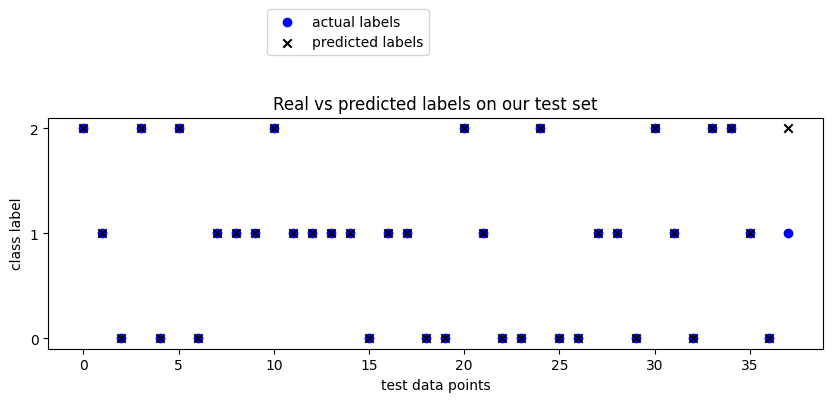

In [31]:
y_pred = knn.predict(X_test)
plt.figure(figsize = (10,3))
x = np.arange(len(y_test))
plt.scatter(x, y_test, label='actual labels', marker='o', color='blue')
plt.scatter(x, y_pred, label='predicted labels', marker='x', color='black')
plt.yticks([0, 1, 2])
plt.title("Real vs predicted labels on our test set")
plt.xlabel("test data points")
plt.ylabel("class label")
plt.legend(bbox_to_anchor=(0.5, 1.5))
plt.show()

As we can see from the plot, two of the 38 data points have been mis-classified

This project reflects my very first step in machine learning, as it is my first model built from scratch. If you have any suggestions or remarks -even if the project is simple- fell free to open an issue or reach out, I'd love to hear your feedback!
   
Made by Rouikha Rym.

<div style="text-align: center"><b>Thank you for your time and attention.</b></div>